In [ ]:
!pip install unidecode
!pip install adjustText

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.9 MB/s eta 0:00:00


In [ ]:
import requests, os, glob, re
import seaborn as sns
from unidecode import *
import pandas as pd
from adjustText import adjust_text
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive', force_remount=True)

%cd '/content/drive/MyDrive/Gestão'

Mounted at /content/drive
/content/drive/MyDrive/Gestão


In [ ]:
all_files = glob.glob(os.path.join("Mortalidade_Geral*.csv"))
files = []

for f in all_files:
    ano = int(re.search(r'\d{4}', os.path.basename(f)).group())
    df = pd.read_csv(f, sep=";", encoding_errors="replace",
                     low_memory=False, memory_map=True)
    df['ANO'] = ano
    files.append(df)

df = pd.concat(files)

In [ ]:
df.head()

,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,...,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR,ANO
0,1,2,23032021,1500.0,811.0,110020.0,18061962.0,458,1,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1313,2021
1,1,2,23032021,243.0,812.0,120050.0,19021971.0,450,1,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1314,2021
2,1,2,23032021,1310.0,812.0,120040.0,1101956.0,464,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1315,2021
3,1,2,17042021,2149.0,812.0,120050.0,6011999.0,422,1,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1505,2021
4,1,2,6012021,420.0,812.0,120020.0,20082020.0,304,1,4.0,...,NaN,NaN,NaN,7062021.0,3.0,7062021.0,NaN,1.0,2215,2021


In [ ]:
df.rename(columns={'TPPOS': 'OBITO_INVEST'}, inplace=True)
df_suicidios = df[['ASSISTMED', 'CAUSABAS_O', 'CIRCOBITO', 'ESTCIV', 'IDADE', 'RACACOR', 'SEXO', 'OBITO_INVEST', 'ANO']]

In [ ]:
suicidio = df_suicidios[df_suicidios['CIRCOBITO'] == 2].reset_index()
suicidio

,index,ASSISTMED,CAUSABAS_O,CIRCOBITO,ESTCIV,IDADE,RACACOR,SEXO,OBITO_INVEST,ANO
0,102,1.0,X700,2.0,9.0,437,4.0,1,NaN,2021
1,413,1.0,X700,2.0,9.0,433,1.0,1,N,2021
2,510,NaN,X700,2.0,1.0,421,4.0,1,NaN,2021
3,548,2.0,X701,2.0,1.0,420,4.0,2,NaN,2021
4,569,1.0,X700,2.0,9.0,422,4.0,1,N,2021
...,...,...,...,...,...,...,...,...,...,...
40895,1556385,1.0,X709,2.0,4.0,463,4.0,1,NaN,2020
40896,1556512,2.0,X709,2.0,4.0,447,1.0,1,NaN,2020
40897,1556637,2.0,X700,2.0,5.0,439,4.0,2,S,2020
40898,1556656,2.0,X720,2.0,1.0,469,4.0,1,NaN,2020


In [ ]:
# Função para transformar a coluna de idade
def transform_age(age_code):
    if age_code > 500:
      return 0

    else:
      age_code = age_code - 400
      return age_code

# Aplicar a função à coluna 'idade' do DataFrame
suicidio['IDADE_NORM'] = suicidio['IDADE'].apply(transform_age)
suicidio = suicidio[suicidio['IDADE_NORM'] != 0].reset_index()
suicidio = suicidio[['ASSISTMED', 'CAUSABAS_O', 'CIRCOBITO', 'ESTCIV', 'IDADE_NORM', 'RACACOR', 'SEXO', 'OBITO_INVEST', 'ANO']]
suicidio.head()

,ASSISTMED,CAUSABAS_O,CIRCOBITO,ESTCIV,IDADE_NORM,RACACOR,SEXO,OBITO_INVEST,ANO
0,1.0,X700,2.0,9.0,37,4.0,1,NaN,2021
1,1.0,X700,2.0,9.0,33,1.0,1,N,2021
2,NaN,X700,2.0,1.0,21,4.0,1,NaN,2021
3,2.0,X701,2.0,1.0,20,4.0,2,NaN,2021
4,1.0,X700,2.0,9.0,22,4.0,1,N,2021


In [ ]:
# Função para transformar a coluna de idade
def transform_sex(sex_code):
    if sex_code == 1:
      sex_code = 'Masculino'
      return sex_code

    else:
      sex_code = 'Feminino'
      return sex_code

# Aplicar a função à coluna 'idade' do DataFrame
suicidio['SEXO_NORM'] = suicidio['SEXO'].apply(transform_sex)
suicidio = suicidio[['ASSISTMED', 'CAUSABAS_O', 'CIRCOBITO', 'ESTCIV', 'IDADE_NORM', 'RACACOR', 'SEXO_NORM', 'OBITO_INVEST', 'ANO']].reset_index()
suicidio.head()

,index,ASSISTMED,CAUSABAS_O,CIRCOBITO,ESTCIV,IDADE_NORM,RACACOR,SEXO_NORM,OBITO_INVEST,ANO
0,0,1.0,X700,2.0,9.0,37,4.0,Masculino,NaN,2021
1,1,1.0,X700,2.0,9.0,33,1.0,Masculino,N,2021
2,2,NaN,X700,2.0,1.0,21,4.0,Masculino,NaN,2021
3,3,2.0,X701,2.0,1.0,20,4.0,Feminino,NaN,2021
4,4,1.0,X700,2.0,9.0,22,4.0,Masculino,N,2021


In [ ]:
cid_10 = pd.read_csv('CID-10-SUBCATEGORIAS.csv', sep=';', low_memory=False, encoding_errors='replace')
cid_10.head()

,SUBCAT,CLASSIF,RESTRSEXO,CAUSAOBITO,DESCRICAO,DESCRABREV,REFER,EXCLUIDOS,Unnamed: 8
0,A000,NaN,NaN,NaN,"C�lera devida a Vibrio cholerae 01, bi�tipo ch...",A00.0 Colera dev Vibrio cholerae 01 biot cholerae,NaN,NaN,NaN
1,A001,NaN,NaN,NaN,"C�lera devida a Vibrio cholerae 01, bi�tipo El...",A00.1 Colera dev Vibrio cholerae 01 biot El Tor,NaN,NaN,NaN
2,A009,NaN,NaN,NaN,C�lera n�o especificada,A00.9 Colera NE,NaN,NaN,NaN
3,A010,NaN,NaN,NaN,Febre tif�ide,A01.0 Febre tifoide,NaN,NaN,NaN
4,A011,NaN,NaN,NaN,Febre paratif�ide A,A01.1 Febre paratifoide A,NaN,NaN,NaN


In [ ]:
def fix_encoding(dataframe, columns):
    for column in columns:
        dataframe[column] = dataframe[column].apply(lambda x: unidecode_expect_nonascii(str(x)) if pd.notnull(x) else x)
        dataframe[column] = dataframe[column].str.encode('utf-8', 'ignore').str.decode('utf-8', 'ignore')

    return dataframe

# Substitua 'seu_dataframe' pelo seu DataFrame e 'colunas_a_corrigir' pelas colunas que você deseja corrigir.
cid_10_2 = fix_encoding(cid_10, ['DESCRICAO'])
cid_10_2['CAUSABAS_O'] = cid_10_2['SUBCAT']

In [ ]:
cid_suicidio_filter = suicidio.merge(cid_10_2[['CAUSABAS_O', 'DESCRICAO']], on='CAUSABAS_O', how='left')
cid_suicidio = cid_suicidio_filter[['ASSISTMED', 'CAUSABAS_O', 'CIRCOBITO', 'ESTCIV', 'IDADE_NORM', 'RACACOR', 'SEXO_NORM', 'OBITO_INVEST', 'ANO', 'DESCRICAO']].reset_index()

In [ ]:
cid_suicidio['DESCRICAO'] = cid_suicidio['DESCRICAO'].str.replace('Leso', 'Lesão')
cid_suicidio.head()

,index,ASSISTMED,CAUSABAS_O,CIRCOBITO,ESTCIV,IDADE_NORM,RACACOR,SEXO_NORM,OBITO_INVEST,ANO,DESCRICAO
0,0,1.0,X700,2.0,9.0,37,4.0,Masculino,NaN,2021,Lesão autoprovocada intencionalmente por enfor...
1,1,1.0,X700,2.0,9.0,33,1.0,Masculino,N,2021,Lesão autoprovocada intencionalmente por enfor...
2,2,NaN,X700,2.0,1.0,21,4.0,Masculino,NaN,2021,Lesão autoprovocada intencionalmente por enfor...
3,3,2.0,X701,2.0,1.0,20,4.0,Feminino,NaN,2021,Lesão autoprovocada intencionalmente por enfor...
4,4,1.0,X700,2.0,9.0,22,4.0,Masculino,N,2021,Lesão autoprovocada intencionalmente por enfor...


In [ ]:
# Criar faixas de idade de 1 a 99 anos em incrementos de 5 anos
faixas_idade = range(1, 101, 10)
# Aplicar a função pd.cut para criar as categorias de idade
cid_suicidio['FAIXA_IDADE'] = pd.cut(cid_suicidio['IDADE_NORM'], bins=faixas_idade)

In [ ]:
# Função para transformar a coluna de idade
def transform_assist(assist_code):
    if assist_code == 1:
      assist_code = 'Sim'
      return assist_code

    elif assist_code == 2:
      assist_code = 'Não'
      return assist_code

    else:
      assist_code = 'Não informado'
      return assist_code

# Aplicar a função à coluna 'idade' do DataFrame
cid_suicidio['ASSISTMED_NORM'] = cid_suicidio['ASSISTMED'].apply(transform_assist)
cid_suicidio.head()

,index,ASSISTMED,CAUSABAS_O,CIRCOBITO,ESTCIV,IDADE_NORM,RACACOR,SEXO_NORM,OBITO_INVEST,ANO,DESCRICAO,FAIXA_IDADE,ASSISTMED_NORM
0,0,1.0,X700,2.0,9.0,37,4.0,Masculino,NaN,2021,Lesão autoprovocada intencionalmente por enfor...,"(31, 41]",Sim
1,1,1.0,X700,2.0,9.0,33,1.0,Masculino,N,2021,Lesão autoprovocada intencionalmente por enfor...,"(31, 41]",Sim
2,2,NaN,X700,2.0,1.0,21,4.0,Masculino,NaN,2021,Lesão autoprovocada intencionalmente por enfor...,"(11, 21]",Não informado
3,3,2.0,X701,2.0,1.0,20,4.0,Feminino,NaN,2021,Lesão autoprovocada intencionalmente por enfor...,"(11, 21]",Não
4,4,1.0,X700,2.0,9.0,22,4.0,Masculino,N,2021,Lesão autoprovocada intencionalmente por enfor...,"(21, 31]",Sim


In [ ]:
# Função para transformar a coluna de idade
def transform_raca(raca_code):
    if raca_code == 1:
      raca_code = 'Branca'
      return raca_code

    elif raca_code == 2:
      raca_code = 'Preta'
      return raca_code

    elif raca_code == 3:
      raca_code = 'Amarela'
      return raca_code

    elif raca_code == 4:
      raca_code = 'Parda'
      return raca_code

    elif raca_code == 5:
      raca_code = 'Indígena'
      return raca_code

    else:
      raca_code = 'Não informado'
      return raca_code

# Aplicar a função à coluna 'idade' do DataFrame
cid_suicidio['RACACOR_NORM'] = cid_suicidio['RACACOR'].apply(transform_raca)
cid_suicidio.head()

,index,ASSISTMED,CAUSABAS_O,CIRCOBITO,ESTCIV,IDADE_NORM,RACACOR,SEXO_NORM,OBITO_INVEST,ANO,DESCRICAO,FAIXA_IDADE,ASSISTMED_NORM,RACACOR_NORM
0,0,1.0,X700,2.0,9.0,37,4.0,Masculino,NaN,2021,Lesão autoprovocada intencionalmente por enfor...,"(31, 41]",Sim,Parda
1,1,1.0,X700,2.0,9.0,33,1.0,Masculino,N,2021,Lesão autoprovocada intencionalmente por enfor...,"(31, 41]",Sim,Branca
2,2,NaN,X700,2.0,1.0,21,4.0,Masculino,NaN,2021,Lesão autoprovocada intencionalmente por enfor...,"(11, 21]",Não informado,Parda
3,3,2.0,X701,2.0,1.0,20,4.0,Feminino,NaN,2021,Lesão autoprovocada intencionalmente por enfor...,"(11, 21]",Não,Parda
4,4,1.0,X700,2.0,9.0,22,4.0,Masculino,N,2021,Lesão autoprovocada intencionalmente por enfor...,"(21, 31]",Sim,Parda


In [ ]:
# Função para transformar a coluna de idade
def transform_est_civ(est_civ_code):
    if est_civ_code == 1:
      est_civ_code = 'Solteiro'
      return est_civ_code

    elif est_civ_code == 2:
      est_civ_code = 'Casado'
      return est_civ_code

    elif est_civ_code == 3:
      est_civ_code = 'Viúvo'
      return est_civ_code

    elif est_civ_code == 4:
      est_civ_code = 'Divorciado'
      return est_civ_code

    elif est_civ_code == 5:
      est_civ_code = 'União Estável'
      return est_civ_code

    else:
      est_civ_code = 'Não Informado'
      return est_civ_code

# Aplicar a função à coluna 'idade' do DataFrame
cid_suicidio['ESTCIV_NORM'] = cid_suicidio['ESTCIV'].apply(transform_est_civ)
cid_suicidio.head()

,index,ASSISTMED,CAUSABAS_O,CIRCOBITO,ESTCIV,IDADE_NORM,RACACOR,SEXO_NORM,OBITO_INVEST,ANO,DESCRICAO,FAIXA_IDADE,ASSISTMED_NORM,RACACOR_NORM,ESTCIV_NORM
0,0,1.0,X700,2.0,9.0,37,4.0,Masculino,NaN,2021,Lesão autoprovocada intencionalmente por enfor...,"(31, 41]",Sim,Parda,Não Informado
1,1,1.0,X700,2.0,9.0,33,1.0,Masculino,N,2021,Lesão autoprovocada intencionalmente por enfor...,"(31, 41]",Sim,Branca,Não Informado
2,2,NaN,X700,2.0,1.0,21,4.0,Masculino,NaN,2021,Lesão autoprovocada intencionalmente por enfor...,"(11, 21]",Não informado,Parda,Solteiro
3,3,2.0,X701,2.0,1.0,20,4.0,Feminino,NaN,2021,Lesão autoprovocada intencionalmente por enfor...,"(11, 21]",Não,Parda,Solteiro
4,4,1.0,X700,2.0,9.0,22,4.0,Masculino,N,2021,Lesão autoprovocada intencionalmente por enfor...,"(21, 31]",Sim,Parda,Não Informado


In [ ]:
cid_suicidio = cid_suicidio[['ASSISTMED_NORM', 'CAUSABAS_O', 'CIRCOBITO', 'ESTCIV_NORM', 'IDADE_NORM', 'RACACOR_NORM', 'SEXO_NORM', 'ANO', 'DESCRICAO', 'FAIXA_IDADE']].reset_index()
cid_suicidio.head()

,index,ASSISTMED_NORM,CAUSABAS_O,CIRCOBITO,ESTCIV_NORM,IDADE_NORM,RACACOR_NORM,SEXO_NORM,ANO,DESCRICAO,FAIXA_IDADE
0,0,Sim,X700,2.0,Não Informado,37,Parda,Masculino,2021,Lesão autoprovocada intencionalmente por enfor...,"(31, 41]"
1,1,Sim,X700,2.0,Não Informado,33,Branca,Masculino,2021,Lesão autoprovocada intencionalmente por enfor...,"(31, 41]"
2,2,Não informado,X700,2.0,Solteiro,21,Parda,Masculino,2021,Lesão autoprovocada intencionalmente por enfor...,"(11, 21]"
3,3,Não,X701,2.0,Solteiro,20,Parda,Feminino,2021,Lesão autoprovocada intencionalmente por enfor...,"(11, 21]"
4,4,Sim,X700,2.0,Não Informado,22,Parda,Masculino,2021,Lesão autoprovocada intencionalmente por enfor...,"(21, 31]"


# **HIPOTESES**

1 - Homem se suicidam mais do que as mulheres

- Jovens-adultos se suicidam mais

2 - Brancos se suicidam mais do que negros

- Brancos tem mais chance de receber tratamento

3 - Solteiros se suicidam mais

4 - Enforcamento é o método mais utilizado

5 - Intervalo com mais casos de suicídio é 2020 - 2021

## Hipotese 1

In [ ]:
suicidio_hip_1 = cid_suicidio[['CAUSABAS_O', 'SEXO_NORM', 'FAIXA_IDADE', 'IDADE_NORM']]

In [ ]:
suicidio_hip_1['SEXO_NORM'] = suicidio_hip_1.SEXO_NORM.astype(str)
suicidio_hip_1['IDADE_NORM'] = pd.to_numeric(suicidio_hip_1.IDADE_NORM, errors='coerce')
suicidio_hip_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40837 entries, 0 to 40836
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CAUSABAS_O   40786 non-null  object  
 1   SEXO_NORM    40837 non-null  object  
 2   FAIXA_IDADE  40757 non-null  category
 3   IDADE_NORM   40837 non-null  int64   
dtypes: category(1), int64(1), object(2)
memory usage: 997.6+ KB


<ipython-input-20-1d171f45e726>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suicidio_hip_1['SEXO_NORM'] = suicidio_hip_1.SEXO_NORM.astype(str)
<ipython-input-20-1d171f45e726>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suicidio_hip_1['IDADE_NORM'] = pd.to_numeric(suicidio_hip_1.IDADE_NORM, errors='coerce')


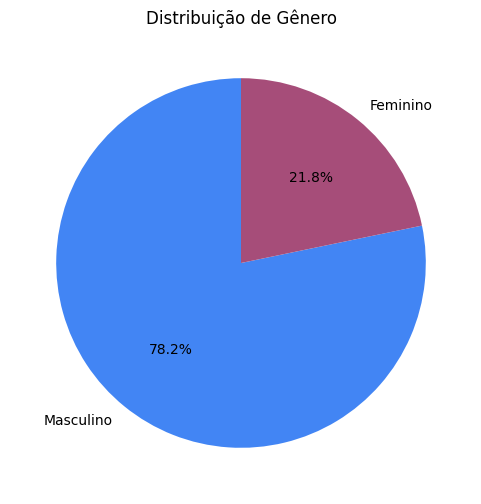

In [ ]:
paleta = ['#4285f4','#a64d79']

# Contar a contagem de cada categoria na coluna 'SEXO_NORM'
contagem_sexo = suicidio_hip_1['SEXO_NORM'].value_counts()

# Configurar o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(contagem_sexo, labels=contagem_sexo.index, autopct='%1.1f%%', startangle=90, colors=paleta)

# Configurar título
plt.title('Distribuição de Gênero')

# Exibir o gráfico
plt.show()

In [ ]:
suicidio_graf_hip_1 = suicidio_hip_1.groupby(['FAIXA_IDADE', 'SEXO_NORM']).count().reset_index()
suicidio_graf_hip_1

,FAIXA_IDADE,SEXO_NORM,CAUSABAS_O,IDADE_NORM
0,"(1, 11]",Feminino,21,21
1,"(1, 11]",Masculino,35,35
2,"(11, 21]",Feminino,1528,1530
3,"(11, 21]",Masculino,3620,3630
4,"(21, 31]",Feminino,1729,1732
5,"(21, 31]",Masculino,6481,6488
6,"(31, 41]",Feminino,1689,1691
7,"(31, 41]",Masculino,6478,6486
8,"(41, 51]",Feminino,1551,1554
9,"(41, 51]",Masculino,5434,5441


In [ ]:
suicidio_graf_hip_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   FAIXA_IDADE  18 non-null     category
 1   SEXO_NORM    18 non-null     object  
 2   CAUSABAS_O   18 non-null     int64   
 3   IDADE_NORM   18 non-null     int64   
dtypes: category(1), int64(2), object(1)
memory usage: 1022.0+ bytes


In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

# Converta a coluna 'FAIXA_IDADE' para strings
suicidio_graf_hip_1['FAIXA_IDADE'] = suicidio_graf_hip_1['FAIXA_IDADE'].astype(str)

fig = px.bar(suicidio_graf_hip_1, x='FAIXA_IDADE', y='CAUSABAS_O', color='SEXO_NORM',
             title='Contagem de Suicídios por Faixa Etária e Sexo')

fig.show()


<Figure size 3000x1000 with 0 Axes>

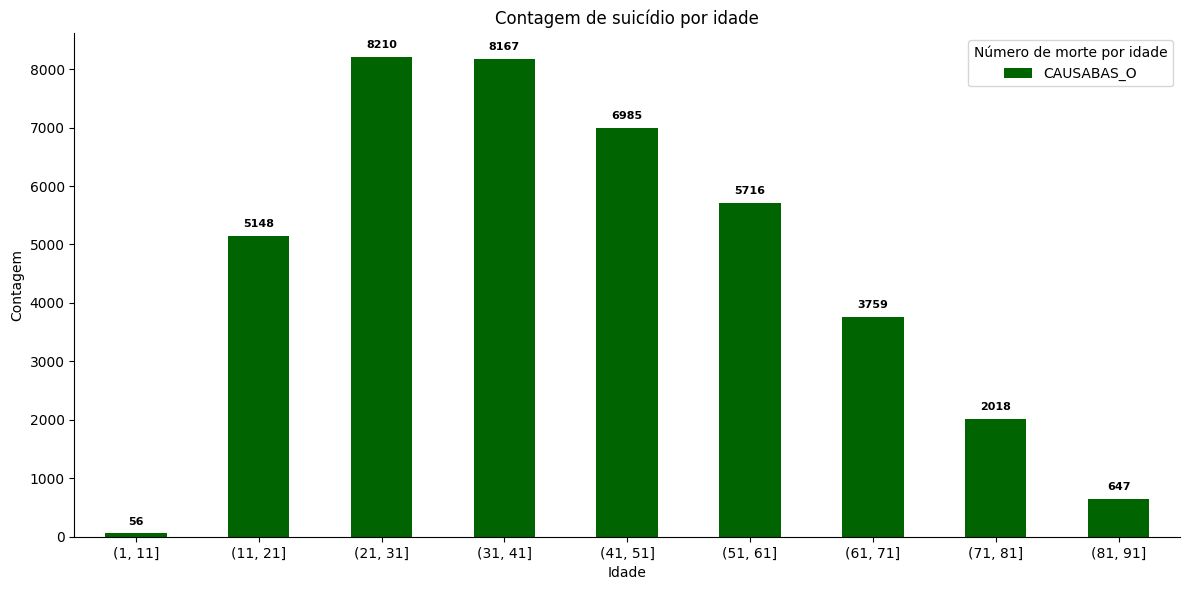

In [ ]:
# Seu código para criar paleta de cores
paleta = ['#006400']

# Pré-processar os dados para empilhar as barras
#suicidio_graf_hip_1['Contagem'] = 1  # Adicionar uma coluna para contar cada ocorrência
pivot_df = suicidio_graf_hip_1.pivot_table(index='FAIXA_IDADE', values='CAUSABAS_O', aggfunc='sum', fill_value=0)

# Configurar o gráfico usando seaborn
plt.figure(figsize=(30, 10))  # Reduzi o tamanho do gráfico para evitar que os valores fiquem muito pequenos
ax = pivot_df.plot(kind='bar', stacked=True, color=paleta, figsize=(12, 6))

# Configurar rótulos dos eixos e título
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.title('Contagem de suicídio por idade')
sns.despine(right=True, top=True)

plt.xticks(rotation=0)

# Adicionar legenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Número de morte por idade')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                ((p.get_x() + p.get_width() / 2.), p.get_height()),
                ha='center',
                va='bottom',
                fontsize=8,
                color='black',
                fontweight='bold',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()  # Garante que os rótulos não se sobreponham
plt.show();

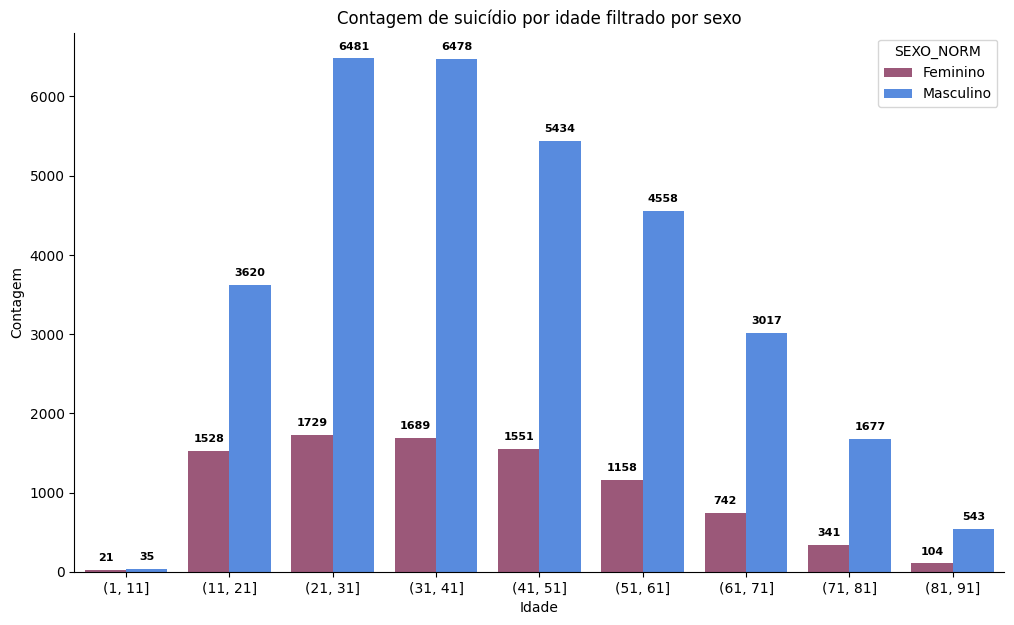

In [ ]:
paleta = ['#a64d79','#4285f4']

# Configurar o gráfico usando seaborn
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=suicidio_graf_hip_1, x='FAIXA_IDADE', y='CAUSABAS_O', hue='SEXO_NORM', palette=paleta, errorbar=None, estimator='sum')

# Configurar rótulos dos eixos e título
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.title('Contagem de suicídio por idade filtrado por sexo')
sns.despine(right=True, top = True)

#Colocando os valores nas baras do Grafico
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                ((p.get_x() + p.get_width() / 2.), p.get_height()),
                ha='center',
                va='bottom',
                fontsize=8,
                color='black',
                fontweight='bold',
                xytext=(0, 5),
                textcoords='offset points')

## Hipotese 2

In [ ]:
suicidio_hip_2 = cid_suicidio[['CAUSABAS_O', 'RACACOR_NORM', 'ASSISTMED_NORM']]

In [ ]:
suicidio_graf_hip_2 = suicidio_hip_2.groupby(['RACACOR_NORM', 'ASSISTMED_NORM']).count().reset_index()

In [ ]:
suicidio_graf_hip_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   RACACOR_NORM    18 non-null     object
 1   ASSISTMED_NORM  18 non-null     object
 2   CAUSABAS_O      18 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 560.0+ bytes


<Figure size 1200x600 with 0 Axes>

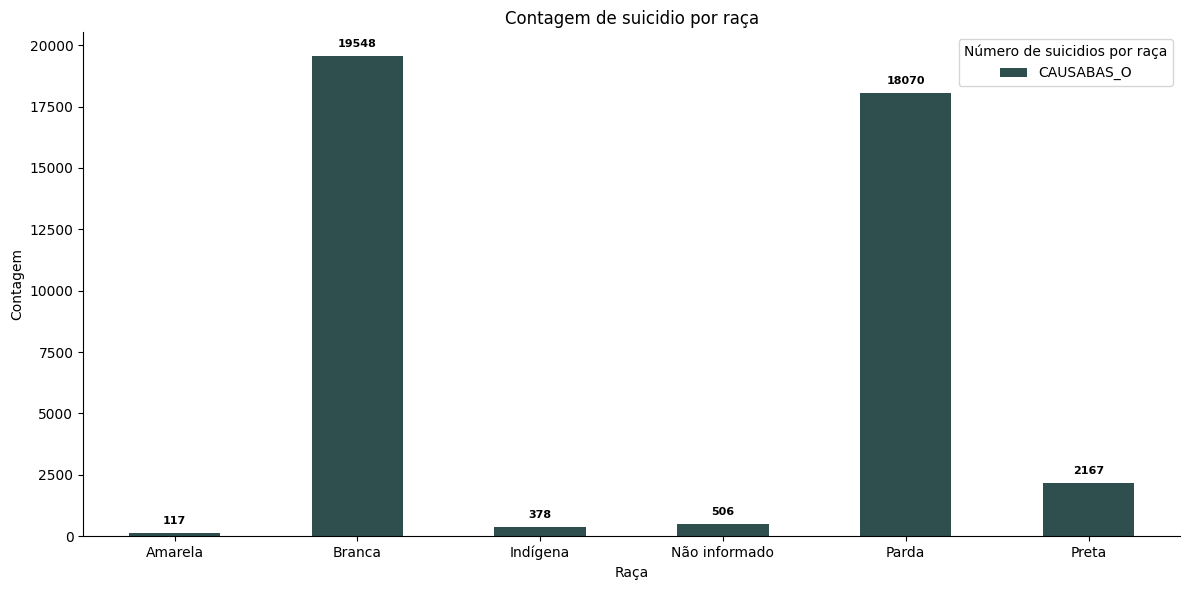

In [ ]:
# Seu código para criar paleta de cores
paleta = ['#2F4F4F']

# Pré-processar os dados para empilhar as barras
#suicidio_graf_hip_1['Contagem'] = 1  # Adicionar uma coluna para contar cada ocorrência
pivot_df = suicidio_graf_hip_2.pivot_table(index='RACACOR_NORM', values='CAUSABAS_O', aggfunc='sum', fill_value=0)

# Configurar o gráfico usando seaborn
plt.figure(figsize=(12, 6))  # Reduzi o tamanho do gráfico para evitar que os valores fiquem muito pequenos
ax = pivot_df.plot(kind='bar', stacked=True, color=paleta, figsize=(12,6))

# Configurar rótulos dos eixos e título
plt.xlabel('Raça')
plt.ylabel('Contagem')
plt.title('Contagem de suicidio por raça')
sns.despine(right=True, top=True)

plt.xticks(rotation=0)

# Adicionar legenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Número de suicidios por raça')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                ((p.get_x() + p.get_width() / 2.), p.get_height()),
                ha='center',
                va='bottom',
                fontsize=8,
                color='black',
                fontweight='bold',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()  # Garante que os rótulos não se sobreponham
plt.show();

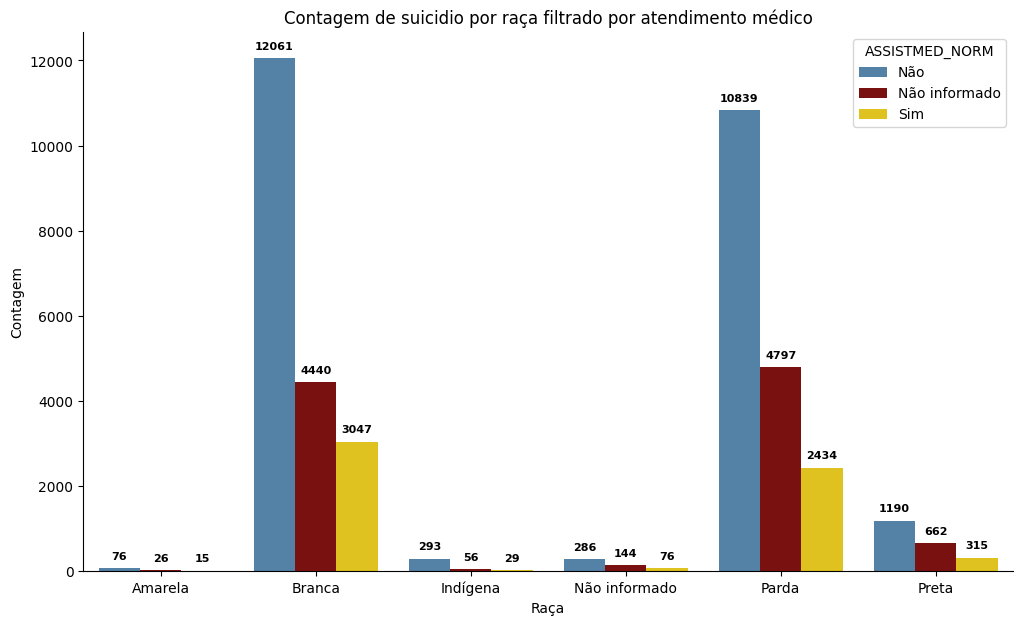

In [ ]:
paleta = ['#4682B4','#8B0000','#FFD700']

# Configurar o gráfico usando seaborn
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=suicidio_graf_hip_2, x='RACACOR_NORM', y='CAUSABAS_O', hue='ASSISTMED_NORM', palette=paleta, errorbar=None, estimator='sum')

# Configurar rótulos dos eixos e título
plt.xlabel('Raça')
plt.ylabel('Contagem')
plt.title('Contagem de suicidio por raça filtrado por atendimento médico')
sns.despine(right=True, top = True)

#Colocando os valores nas baras do Grafico
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                ((p.get_x() + p.get_width() / 2.), p.get_height()),
                ha='center',
                va='bottom',
                fontsize=8,
                color='black',
                fontweight='bold',
                xytext=(0, 5),
                textcoords='offset points')

##Hipotese 3

In [ ]:
suicidio_hip_3 = cid_suicidio[['CAUSABAS_O', 'ESTCIV_NORM', 'SEXO_NORM']]

In [ ]:
suicidio_graf_hip_3 = suicidio_hip_3.groupby(['SEXO_NORM', 'ESTCIV_NORM']).count().reset_index()
suicidio_graf_hip_3

,SEXO_NORM,ESTCIV_NORM,CAUSABAS_O
0,Feminino,Casado,1986
1,Feminino,Divorciado,797
2,Feminino,Não Informado,633
3,Feminino,Solteiro,4551
4,Feminino,União Estável,430
5,Feminino,Viúvo,474
6,Masculino,Casado,7923
7,Masculino,Divorciado,2152
8,Masculino,Não Informado,2649
9,Masculino,Solteiro,16681


In [ ]:
suicidio_graf_hip_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SEXO_NORM    12 non-null     object
 1   ESTCIV_NORM  12 non-null     object
 2   CAUSABAS_O   12 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 416.0+ bytes


<Figure size 1200x600 with 0 Axes>

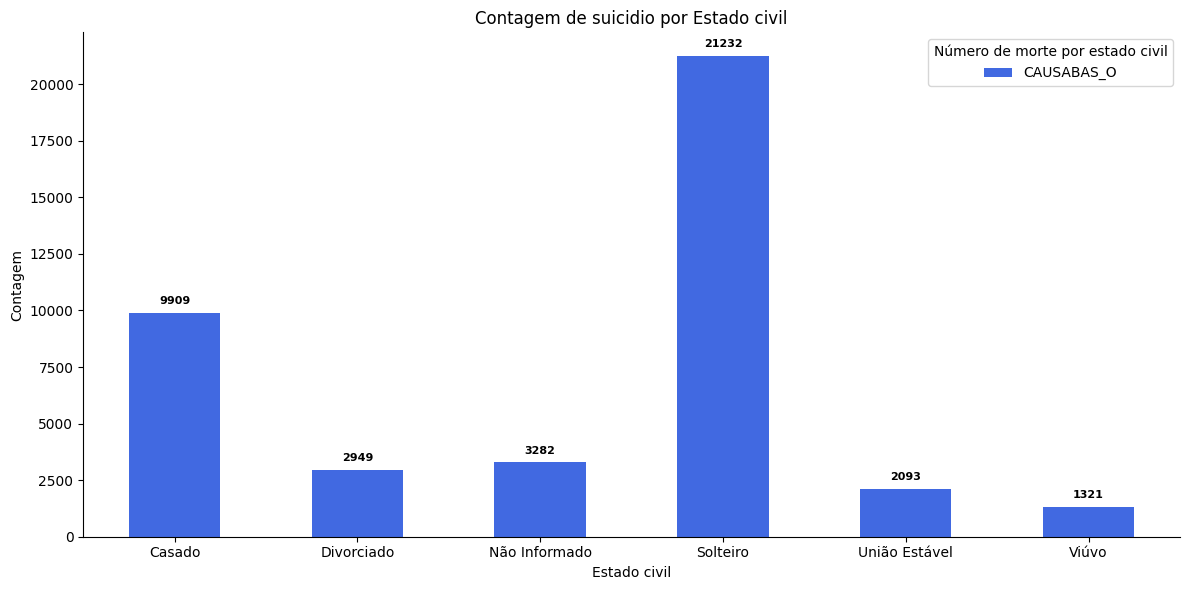

In [ ]:
# Seu código para criar paleta de cores
paleta = ['#4169E1']

# Pré-processar os dados para empilhar as barras
#suicidio_graf_hip_1['Contagem'] = 1  # Adicionar uma coluna para contar cada ocorrência
pivot_df = suicidio_graf_hip_3.pivot_table(index='ESTCIV_NORM', values='CAUSABAS_O', aggfunc='sum', fill_value=0)

# Configurar o gráfico usando seaborn
plt.figure(figsize=(12, 6))  # Reduzi o tamanho do gráfico para evitar que os valores fiquem muito pequenos
ax = pivot_df.plot(kind='bar', stacked=True, color=paleta, figsize=(12,6))

# Configurar rótulos dos eixos e título
plt.xlabel('Estado civil')
plt.ylabel('Contagem')
plt.title('Contagem de suicidio por Estado civil')
sns.despine(right=True, top=True)

plt.xticks(rotation=0)

# Adicionar legenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Número de morte por estado civil')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                ((p.get_x() + p.get_width() / 2.), p.get_height()),
                ha='center',
                va='bottom',
                fontsize=8,
                color='black',
                fontweight='bold',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()  # Garante que os rótulos não se sobreponham
plt.show();

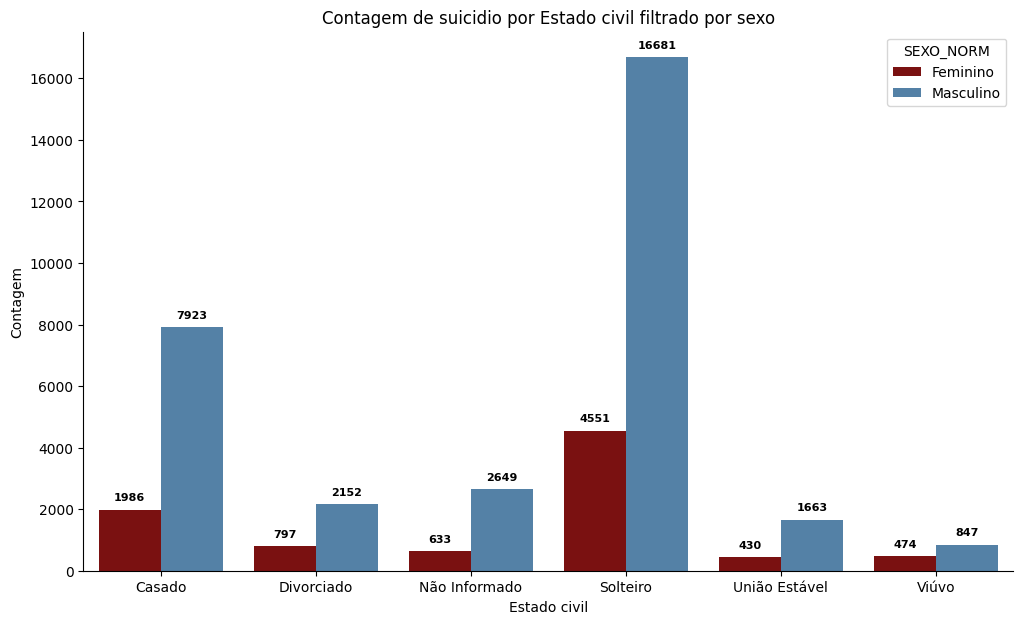

In [ ]:
paleta = ['#8B0000','#4682B4']

# Configurar o gráfico usando seaborn
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=suicidio_graf_hip_3, x='ESTCIV_NORM', y='CAUSABAS_O', hue='SEXO_NORM', palette=paleta, errorbar=None, estimator='sum')

# Configurar rótulos dos eixos e título
plt.xlabel('Estado civil')
plt.ylabel('Contagem')
plt.title('Contagem de suicidio por Estado civil filtrado por sexo')
sns.despine(right=True, top = True)

#Colocando os valores nas baras do Grafico
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                ((p.get_x() + p.get_width() / 2.), p.get_height()),
                ha='center',
                va='bottom',
                fontsize=8,
                color='black',
                fontweight='bold',
                xytext=(0, 5),
                textcoords='offset points')

## Hipotese 4

In [ ]:
suicidio_hip_4 = cid_suicidio[['CAUSABAS_O', 'DESCRICAO']]

In [ ]:
suicidio_graf_hip_4 = suicidio_hip_4.groupby(['CAUSABAS_O']).count().reset_index()
suicidio_graf_hip_4 = suicidio_graf_hip_4[suicidio_graf_hip_4['DESCRICAO']>430]
suicidio_graf_hip_4

,CAUSABAS_O,DESCRICAO
82,R99,860
211,X700,20409
215,X704,1007
219,X708,1430
220,X709,3396
229,X720,524
246,X740,971
286,X800,436
354,Y200,1146
408,Y349,606


In [ ]:
suicidio_graf_hip_4['DESCRICAO'] = suicidio_graf_hip_4['DESCRICAO'].str.replace('e exposio', 'exposição')
suicidio_graf_hip_4['DESCRICAO'] = suicidio_graf_hip_4['DESCRICAO'].str.replace('substncias', 'substâncias')
suicidio_graf_hip_4['DESCRICAO'] = suicidio_graf_hip_4['DESCRICAO'].str.replace('biolgicas', 'biológicas')
suicidio_graf_hip_4['DESCRICAO'] = suicidio_graf_hip_4['DESCRICAO'].str.replace('e s no', 'e substâncias não')
suicidio_graf_hip_4['DESCRICAO'] = suicidio_graf_hip_4['DESCRICAO'].str.replace('residncia', 'residência')
suicidio_graf_hip_4['DESCRICAO'] = suicidio_graf_hip_4['DESCRICAO'].str.replace('sufocao', 'sufocamento')
suicidio_graf_hip_4['DESCRICAO'] = suicidio_graf_hip_4['DESCRICAO'].str.replace('inteno no', 'intenção não')
suicidio_graf_hip_4['DESCRICAO'] = suicidio_graf_hip_4['DESCRICAO'].str.replace(' no', ' não')
suicidio_graf_hip_4['DESCRICAO'] = suicidio_graf_hip_4['DESCRICAO'].str.replace('e exposio', 'exposição')
suicidio_graf_hip_4['DESCRICAO'] = suicidio_graf_hip_4['DESCRICAO'].str.replace('precipitao', 'precipitação')
suicidio_graf_hip_4['DESCRICAO'] = suicidio_graf_hip_4['DESCRICAO'].str.replace('e as', 'e causas')
suicidio_graf_hip_4['DESCRICAO'] = suicidio_graf_hip_4['DESCRICAO'].str.replace('de mo', '')

AttributeError: ignored

In [ ]:
# Define o tamanho da figura
plt.figure(figsize=(12, 7))

# Crie o gráfico de barras
ax = sns.barplot(x='CAUSABAS_O', y='DESCRICAO', data=suicidio_graf_hip_4)

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=0)

plt.xlabel('Contagem de Suicídios')
plt.ylabel('Descrição CID-10')
plt.title('Contagem de Suicídios por CID-10')
sns.despine(right=True, top = True)

# Adicione os valores de contagem ao lado das barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_y() + p.get_height() / 2
    ax.annotate(f'{int(width)}', xy=(width, height), ha='left', va='center')


plt.show()

## Hipotese 5

In [ ]:
suicidio_hip_5 = cid_suicidio[['CAUSABAS_O', 'ANO']]
suicidio_graf_hip_5 = suicidio_hip_5.groupby(['ANO']).count().reset_index()

In [ ]:
suicidio_graf_hip_5

In [ ]:

# Calcular a taxa de aumento
taxa_2019_2020 = (suicidio_graf_hip_5[suicidio_graf_hip_5['ANO'] == 2020]['CAUSABAS_O'].values[0] - suicidio_graf_hip_5[suicidio_graf_hip_5['ANO'] == 2019]['CAUSABAS_O'].values[0]) / suicidio_graf_hip_5[suicidio_graf_hip_5['ANO'] == 2019]['CAUSABAS_O'].values[0]

taxa_2020_2021 = (suicidio_graf_hip_5[suicidio_graf_hip_5['ANO'] == 2021]['CAUSABAS_O'].values[0] - suicidio_graf_hip_5[suicidio_graf_hip_5['ANO'] == 2020]['CAUSABAS_O'].values[0]) / suicidio_graf_hip_5[suicidio_graf_hip_5['ANO'] == 2020]['CAUSABAS_O'].values[0]

# Criar uma tabela para as taxas
taxas_df = pd.DataFrame({'ANO': ['2019-2020', '2020-2021'], 'Taxa de Aumento': [taxa_2019_2020, taxa_2020_2021]})

print(taxas_df)

In [ ]:
# Defina os intervalos dos valores do eixo x
anos = suicidio_graf_hip_5['ANO'].unique()
anos.sort()  # Ordena os anos em ordem crescente

plt.figure(figsize=(10, 6))
sns.lineplot(x='ANO', y='CAUSABAS_O', data=suicidio_graf_hip_5, marker='o', color='green')
plt.xticks(anos, anos)  # Define os anos como rótulos no eixo x
plt.xlabel('Ano')  # Rótulo do eixo x
plt.ylabel('Contagem de Suicídios')  # Rótulo do eixo y
plt.title('Intervalo de Casos de Suicídios por Ano')  # Título do gráfico

sns.despine(right=True, top=True)

# Adicione os valores acima das bolas (pontos)
for index, row in suicidio_graf_hip_5.iterrows():
    plt.annotate(str(row['CAUSABAS_O']), (row['ANO'], row['CAUSABAS_O']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()
